In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb

from sklearn.metrics import mean_squared_error
paleta_colores = sns.color_palette()
plt.style.use("fivethirtyeight")

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

# Selección del set de datos y la elección de las columnas a emplear

In [2]:
dataframe = pd.read_excel(r'C:\Users\harol\Downloads\dataverse_files\Dengue_selected_cities.xlsx', sheet_name = "Maranguape", usecols = ["date", "N_cases","dengue", "a dengue", "sintomas da dengue", "sintomas dengue", "sobre a dengue", "sintomas de dengue", "Mosquito da dengue", "Mosquito Dengue", "dengue hemorragica", "mosquito", "mosquitos", "percipitation", "humidity" ])
dataframe

,date,N_cases,dengue,a dengue,sintomas da dengue,sintomas dengue,sobre a dengue,sintomas de dengue,Mosquito da dengue,Mosquito Dengue,dengue hemorragica,mosquito,mosquitos,percipitation,humidity
0,2010-01-03,0,1127.152461,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,820.942952,0.000000,15.016184,0.016344
1,2010-01-10,0,713.816635,717.759975,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,709.485349,0.000000,0.000000,8.522304,0.015986
2,2010-01-17,1,3228.873453,1793.710458,0.000000,716.344857,719.146818,0.000000,0.000000,0.000000,721.105161,0.000000,0.000000,6.676003,0.016221
3,2010-01-24,0,1370.030551,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1485.095785,742.547892,14.994275,0.016666
4,2010-01-31,1,1706.021494,678.469600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.449473,0.017355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,2016-07-03,10,1689.130975,237.583271,105.560722,237.511624,52.842637,52.842637,264.539778,291.009735,0.000000,685.268582,114.633280,9.669062,0.015421
340,2016-07-10,10,1409.726234,159.577126,132.980914,186.173279,133.141422,106.581394,346.513748,373.150069,0.000000,688.085279,86.014986,2.152800,0.014416
341,2016-07-17,2,1315.260333,219.222446,246.588036,328.784048,54.863482,109.181508,274.524635,274.524635,55.289100,648.263530,58.454207,1.913044,0.014006
342,2016-07-24,3,1439.694825,190.144202,217.288903,244.450016,108.775585,135.969482,162.891027,162.891027,0.000000,700.420652,58.047813,3.300317,0.012785


# Selección de las fechas a ser empleada

In [3]:
dataframe = dataframe.set_index("date")
dataframe = dataframe.loc[ dataframe.index > "2011-01-01"]
dataframe

,N_cases,dengue,a dengue,sintomas da dengue,sintomas dengue,sobre a dengue,sintomas de dengue,Mosquito da dengue,Mosquito Dengue,dengue hemorragica,mosquito,mosquitos,percipitation,humidity
date,,,,,,,,,,,,,,
2011-01-02,0,1946.924603,169.281152,167.364865,423.139021,167.566875,254.189850,167.617453,167.617453,171.862922,457.265145,181.703154,20.280739,0.016522
2011-01-09,4,2285.845185,487.703462,326.542221,571.448887,164.128556,162.813095,488.586716,488.586716,0.000000,965.925451,175.277175,20.683040,0.016921
2011-01-16,3,2493.439685,756.983953,377.659266,528.722973,151.004695,454.464476,151.050275,151.050275,151.900683,733.107481,0.000000,31.150970,0.017345
2011-01-23,4,1736.280986,157.850214,471.457250,394.565988,0.000000,237.025337,314.779184,472.168776,0.000000,1360.958593,512.584618,26.265675,0.017456
2011-01-30,7,3004.378162,237.157645,316.210136,316.210136,316.436483,237.443852,792.556077,792.556077,395.287972,1018.617656,169.751813,18.017809,0.017857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-07-03,10,1689.130975,237.583271,105.560722,237.511624,52.842637,52.842637,264.539778,291.009735,0.000000,685.268582,114.633280,9.669062,0.015421
2016-07-10,10,1409.726234,159.577126,132.980914,186.173279,133.141422,106.581394,346.513748,373.150069,0.000000,688.085279,86.014986,2.152800,0.014416
2016-07-17,2,1315.260333,219.222446,246.588036,328.784048,54.863482,109.181508,274.524635,274.524635,55.289100,648.263530,58.454207,1.913044,0.014006


# Gráfico de número de casos de dengue por semana

<AxesSubplot: title={'center': 'Casos de dengue semanales'}, xlabel='date'>

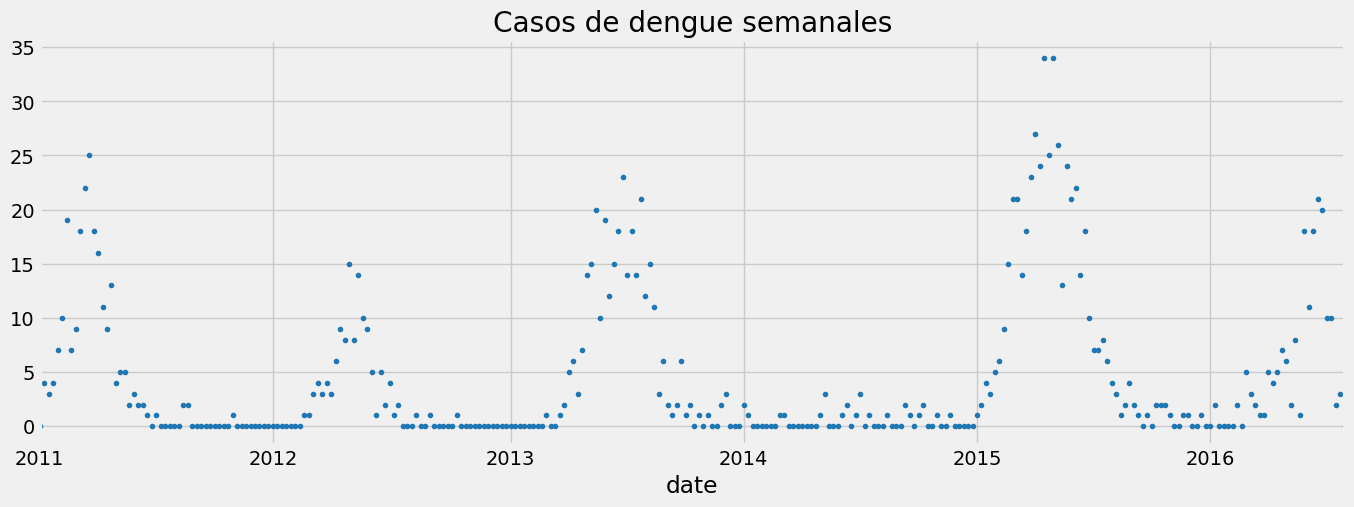

In [4]:
dataframe["N_cases"].plot( style = ".", figsize = (15, 5), color = paleta_colores[0], title = "Casos de dengue semanales" )

# Creación de características

In [5]:
def crear_caracteristicas(dataframe):
    dataframe["week"] = dataframe.index.isocalendar().week
    dataframe["week"] = dataframe["week"].astype(np.int64)
    return dataframe

In [6]:
dataframe = crear_caracteristicas(dataframe)
dataframe 

,N_cases,dengue,a dengue,sintomas da dengue,sintomas dengue,sobre a dengue,sintomas de dengue,Mosquito da dengue,Mosquito Dengue,dengue hemorragica,mosquito,mosquitos,percipitation,humidity,week
date,,,,,,,,,,,,,,,
2011-01-02,0,1946.924603,169.281152,167.364865,423.139021,167.566875,254.189850,167.617453,167.617453,171.862922,457.265145,181.703154,20.280739,0.016522,52
2011-01-09,4,2285.845185,487.703462,326.542221,571.448887,164.128556,162.813095,488.586716,488.586716,0.000000,965.925451,175.277175,20.683040,0.016921,1
2011-01-16,3,2493.439685,756.983953,377.659266,528.722973,151.004695,454.464476,151.050275,151.050275,151.900683,733.107481,0.000000,31.150970,0.017345,2
2011-01-23,4,1736.280986,157.850214,471.457250,394.565988,0.000000,237.025337,314.779184,472.168776,0.000000,1360.958593,512.584618,26.265675,0.017456,3
2011-01-30,7,3004.378162,237.157645,316.210136,316.210136,316.436483,237.443852,792.556077,792.556077,395.287972,1018.617656,169.751813,18.017809,0.017857,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-07-03,10,1689.130975,237.583271,105.560722,237.511624,52.842637,52.842637,264.539778,291.009735,0.000000,685.268582,114.633280,9.669062,0.015421,26
2016-07-10,10,1409.726234,159.577126,132.980914,186.173279,133.141422,106.581394,346.513748,373.150069,0.000000,688.085279,86.014986,2.152800,0.014416,27
2016-07-17,2,1315.260333,219.222446,246.588036,328.784048,54.863482,109.181508,274.524635,274.524635,55.289100,648.263530,58.454207,1.913044,0.014006,28


# Visualizar características

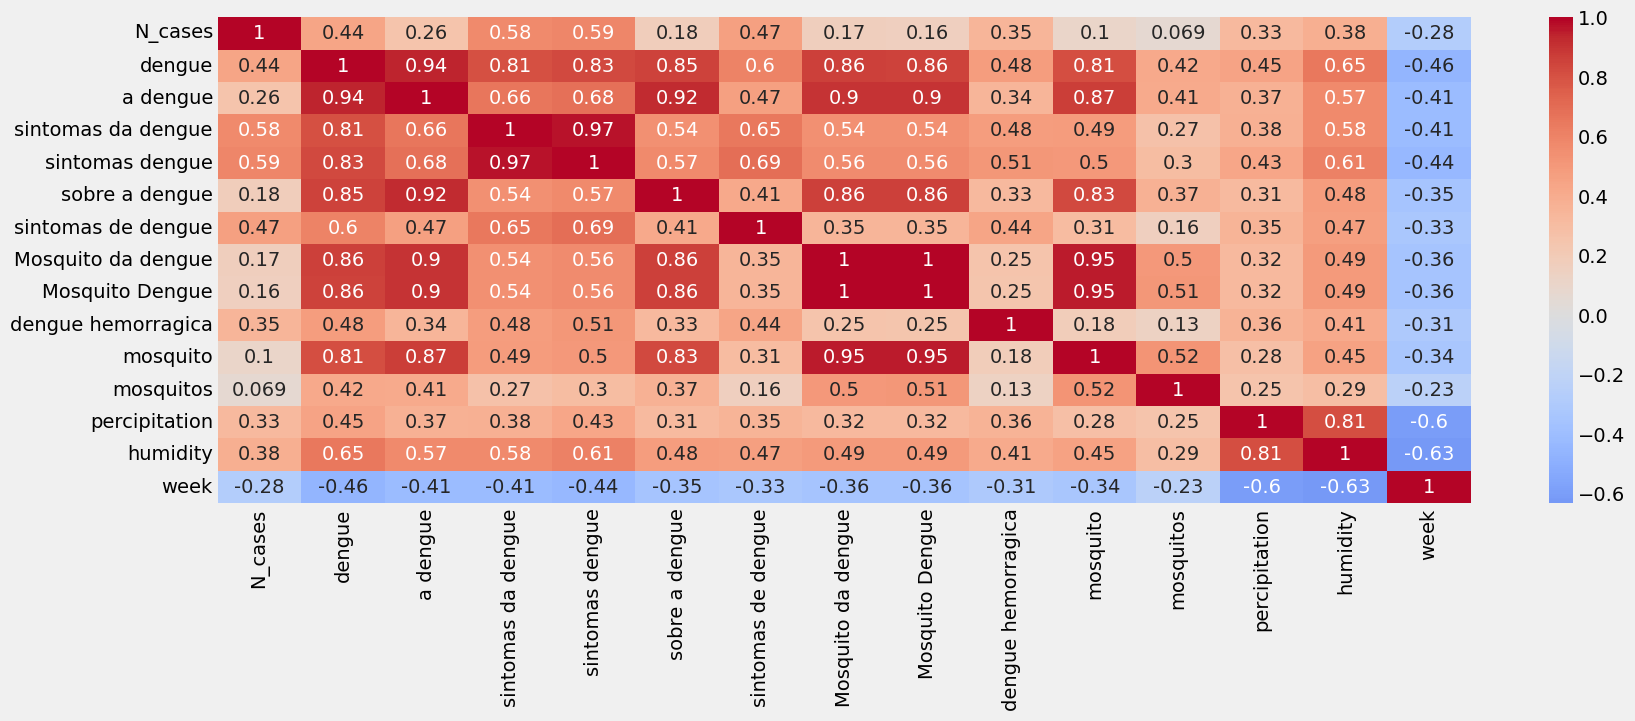

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 6))
sns.heatmap(dataframe.corr(), cmap='coolwarm', annot=True, center=0)
plt.show()

# Crear el modelo

In [8]:
X, y = dataframe[['week', "dengue", "a dengue", "sintomas da dengue", "sintomas dengue", "sobre a dengue", "sintomas de dengue", "Mosquito da dengue", "Mosquito Dengue", "dengue hemorragica", "mosquito", "mosquitos", "percipitation", "humidity"]].values, dataframe['N_cases'].values

### Partir la data

In [9]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(dataframe, test_size=14, shuffle=False)
X_train, y_train = df_train[['week', "dengue", "a dengue", "sintomas da dengue", "sintomas dengue", 
                             "sobre a dengue", "sintomas de dengue", "Mosquito da dengue", "Mosquito Dengue", 
                             "dengue hemorragica", "mosquito", "mosquitos", "percipitation", "humidity"]].values, df_train['N_cases'].values.T
        
X_test, y_test = df_test[['week', "dengue", "a dengue", "sintomas da dengue", "sintomas dengue", 
                          "sobre a dengue", "sintomas de dengue", "Mosquito da dengue", "Mosquito Dengue", 
                          "dengue hemorragica", "mosquito", "mosquitos", "percipitation", "humidity"]].values, df_test['N_cases'].values.T
print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 278 rows
Test Set: 14 rows


### Creación del modelo empleando el algoritmo XGBoost

In [10]:
model = xgb.XGBRegressor( n_estimators = 10000, 
                                     max_depth = 7, 
                                     learning_rate = 0.005,
                                    early_stopping_rounds = 10,
                                    num_parallel_tree = 4
                                   )
model.fit(X_train, y_train,
                      eval_set = [ (X_train, y_train),(X_test, y_test) ], 
                      verbose = 20)

[0]	validation_0-rmse:7.88160	validation_1-rmse:11.32232
[20]	validation_0-rmse:7.26521	validation_1-rmse:10.92415
[40]	validation_0-rmse:6.70430	validation_1-rmse:10.60249
[60]	validation_0-rmse:6.19855	validation_1-rmse:10.31540
[80]	validation_0-rmse:5.73778	validation_1-rmse:10.07938
[100]	validation_0-rmse:5.31371	validation_1-rmse:9.87298
[120]	validation_0-rmse:4.92394	validation_1-rmse:9.66915
[140]	validation_0-rmse:4.56991	validation_1-rmse:9.49343
[160]	validation_0-rmse:4.24090	validation_1-rmse:9.36882
[180]	validation_0-rmse:3.94138	validation_1-rmse:9.26014
[200]	validation_0-rmse:3.66924	validation_1-rmse:9.18709
[220]	validation_0-rmse:3.41125	validation_1-rmse:9.08186
[240]	validation_0-rmse:3.17693	validation_1-rmse:9.00162
[260]	validation_0-rmse:2.95493	validation_1-rmse:8.93941
[280]	validation_0-rmse:2.75052	validation_1-rmse:8.88462
[300]	validation_0-rmse:2.56213	validation_1-rmse:8.79010
[320]	validation_0-rmse:2.38465	validation_1-rmse:8.69650
[340]	validatio

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=10, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.005, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=10000,
             n_jobs=0, num_parallel_tree=4, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

# Pronóstico de predicción

In [11]:
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr

## Predicción en el modelo en data de prueba

In [20]:
predictions = model.predict(X_test)
predictions_test = predictions
def relative_root_mean_squared_error(rmse, y_test):    
    den = np.max(y_test) - np.min(y_test)
    return (rmse/den)

mse = mean_squared_error(y_test, predictions)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions) if r2_score(y_test, predictions) >= 0 else 0.0
print("R2:", r2)

print("R-RMSE:", relative_root_mean_squared_error(rmse, y_test))

print('Correlación de Peason:', pearsonr(y_test, predictions)[0])

RMSE: 8.230119265956755
R2: 0.0
R-RMSE: 0.39191044123603597
Correlación de Peason: 0.18176650259375263


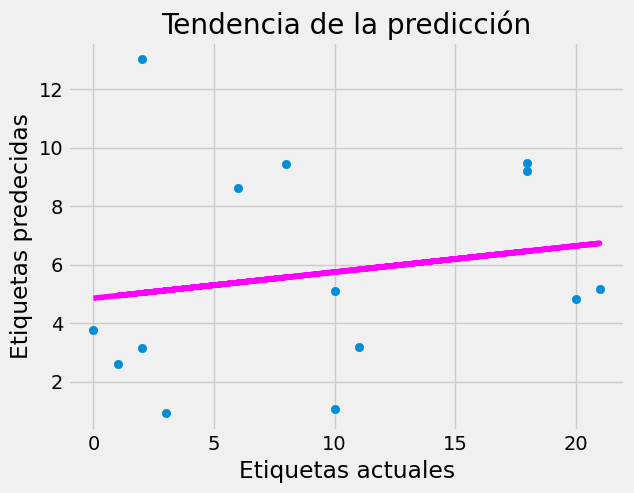

In [21]:
# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Etiquetas actuales')
plt.ylabel('Etiquetas predecidas')
plt.title('Tendencia de la predicción')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

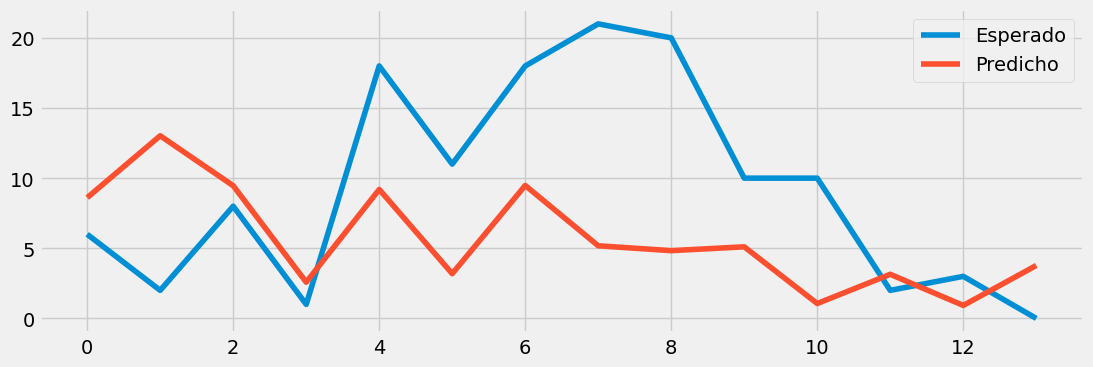

In [22]:
fig, ax = plt.subplots(figsize=(12, 4))
plt.plot(y_test, label='Esperado')
plt.plot(predictions, label='Predicho')
plt.legend()
plt.show()

## Predicción en el modelo en data de entrenamiento

In [23]:
predictions = model.predict(X_train)

# Display metrics
mse = mean_squared_error(y_train, predictions)

rmse = np.sqrt(mse)

print("RMSE:", rmse)

r2 = r2_score(y_train, predictions) if r2_score(y_train, predictions) >= 0 else 0.0
print("R2:", r2)

print("R-RMSE:", relative_root_mean_squared_error(rmse, y_train))

print('Correlación de Pearson:', pearsonr(y_train, predictions)[0])

RMSE: 1.1213604784710955
R2: 0.9737635967167309
R-RMSE: 0.032981190543267515
Correlación de Pearson: 0.9971586694583202


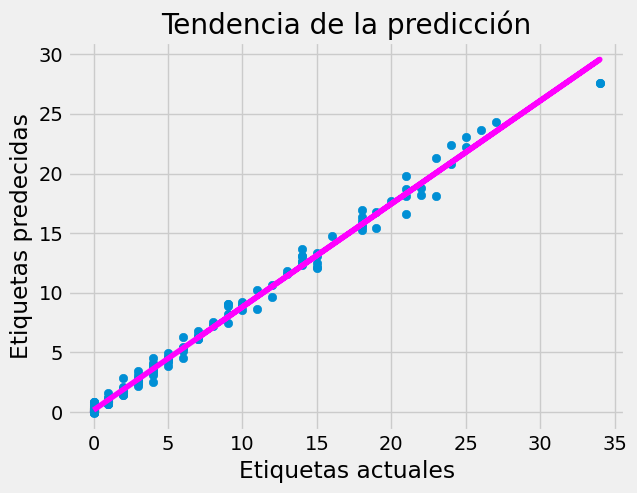

In [24]:
# Plot predicted vs actual
plt.scatter(y_train, predictions)
plt.xlabel('Etiquetas actuales')
plt.ylabel('Etiquetas predecidas')
plt.title('Tendencia de la predicción')
# overlay the regression line
z = np.polyfit(y_train, predictions, 1)
p = np.poly1d(z)
plt.plot(y_train,p(y_train), color='magenta')
plt.show()

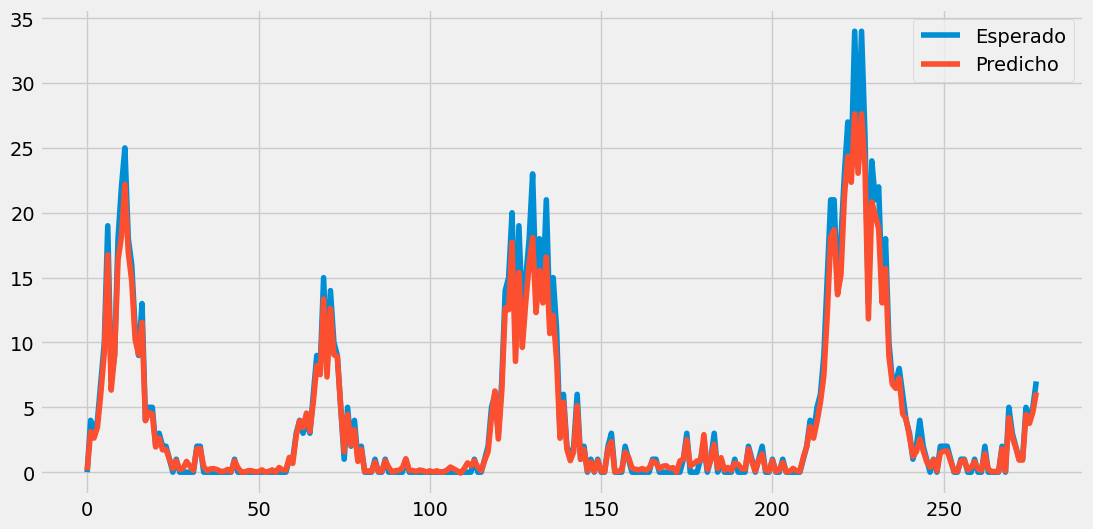

In [25]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(y_train, label='Esperado')
plt.plot(predictions, label='Predicho')
plt.legend()
plt.show()

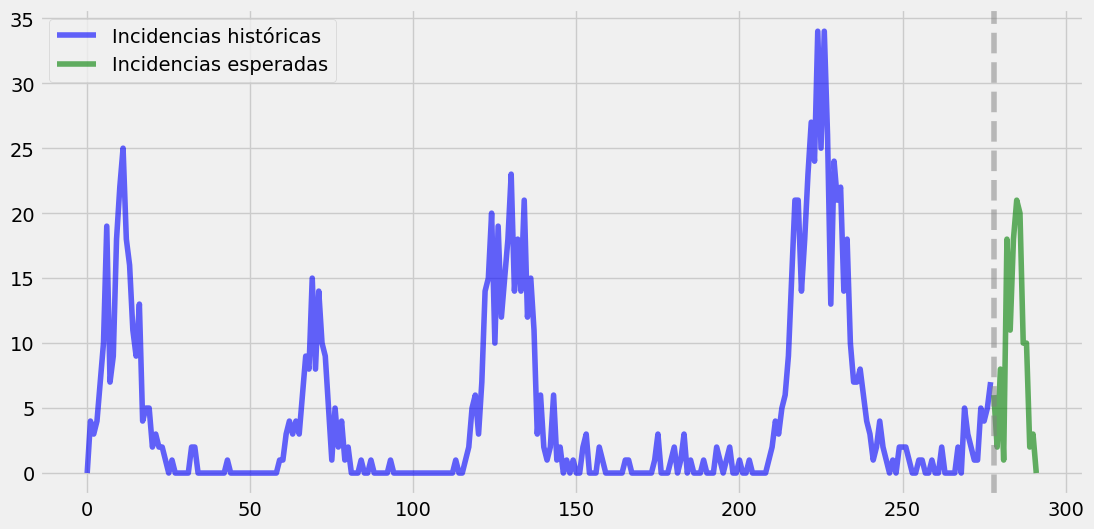

In [18]:
esperado = np.concatenate((y_train, y_test))

fig, ax = plt.subplots(figsize=(12, 6))
# Dibujar y_train
plt.plot(y_train, label='Incidencias históricas', color='blue', alpha=0.6)

# Dibujar y_test
plt.plot(range(len(y_train), len(esperado)), y_test, label='Incidencias esperadas', color='green', alpha=0.6)

# Dibujar la línea donde empieza y_test y predictions
plt.axvline(x=len(y_train), color='grey', linestyle='--', alpha = 0.5)

plt.legend()
plt.show()

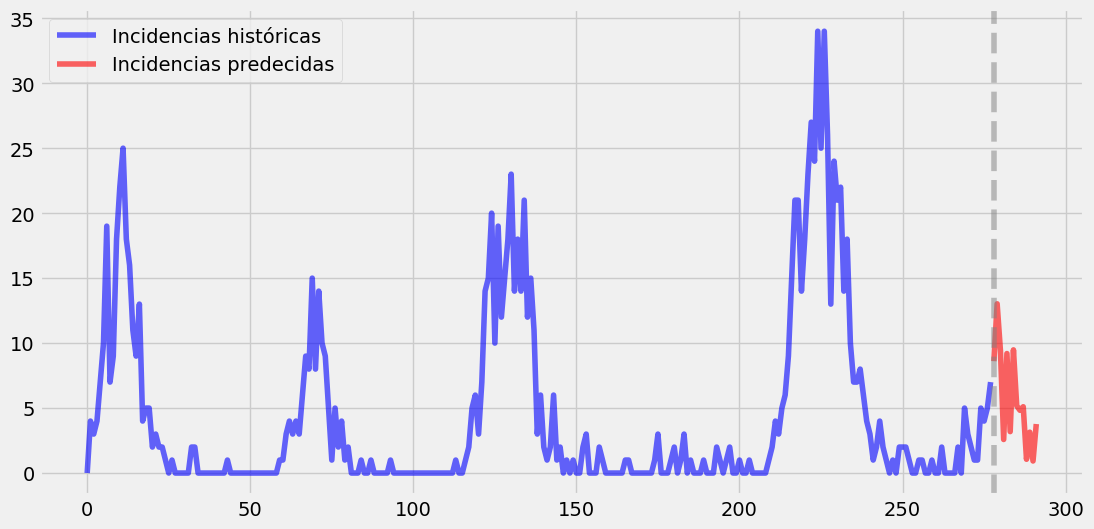

In [19]:
fig, ax = plt.subplots(figsize=(12, 6))

# Dibujar y_train
plt.plot(y_train, label='Incidencias históricas', color='blue', alpha=0.6)

# Dibujar y_test
plt.plot(range(len(y_train), len(esperado)), predictions_test, label='Incidencias predecidas', color='red', alpha=0.6)

# Dibujar la línea donde empieza y_test y predictions
plt.axvline(x=len(y_train), color='grey', linestyle='--', alpha = 0.5)

plt.legend()
plt.show()